In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, plot_confusion_matrix, f1_score, recall_score, classification_report

%matplotlib inline

In [2]:
data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
data.shape

(569, 32)

In [4]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### By seeing the information of this dataset

- All columns have float64 data-type
- Target attribute 'diagnosis' has 'object' data-type
- It has categorical output (2) variable

In [6]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### There is not a single null value present in this dataset

# EDA

# Univariate Analysis

## Data Imbalance

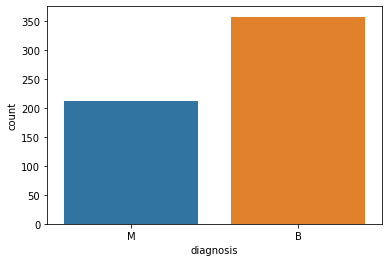

In [7]:
sns.countplot(x='diagnosis', data=data)

In [8]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

- There is not much data imbalance present
- So, we can proceed further without much caring for data imbalance
- Or We can handle it by many ways - upsampling/downsampling

### We will go one by one feature

- As 'Id' is not carray any important information for our problem so it's better to drop it

In [9]:
data.drop(columns=['id'], inplace=True)

In [10]:
data.shape

(569, 31)

- 'diagnosis' is output variable
- It has 2 categories present
- B and M
- Map it to 0 and 1

In [11]:
diag_map = {
    "M":1,
    "B":0
}

data['diagnosis'] = data['diagnosis'].map(diag_map)

In [12]:
data[['diagnosis']]

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


## Let's Plot the Histogram of remaining features to visualize their distribution

In [13]:
cols_name = list(data.columns)
cols_name

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

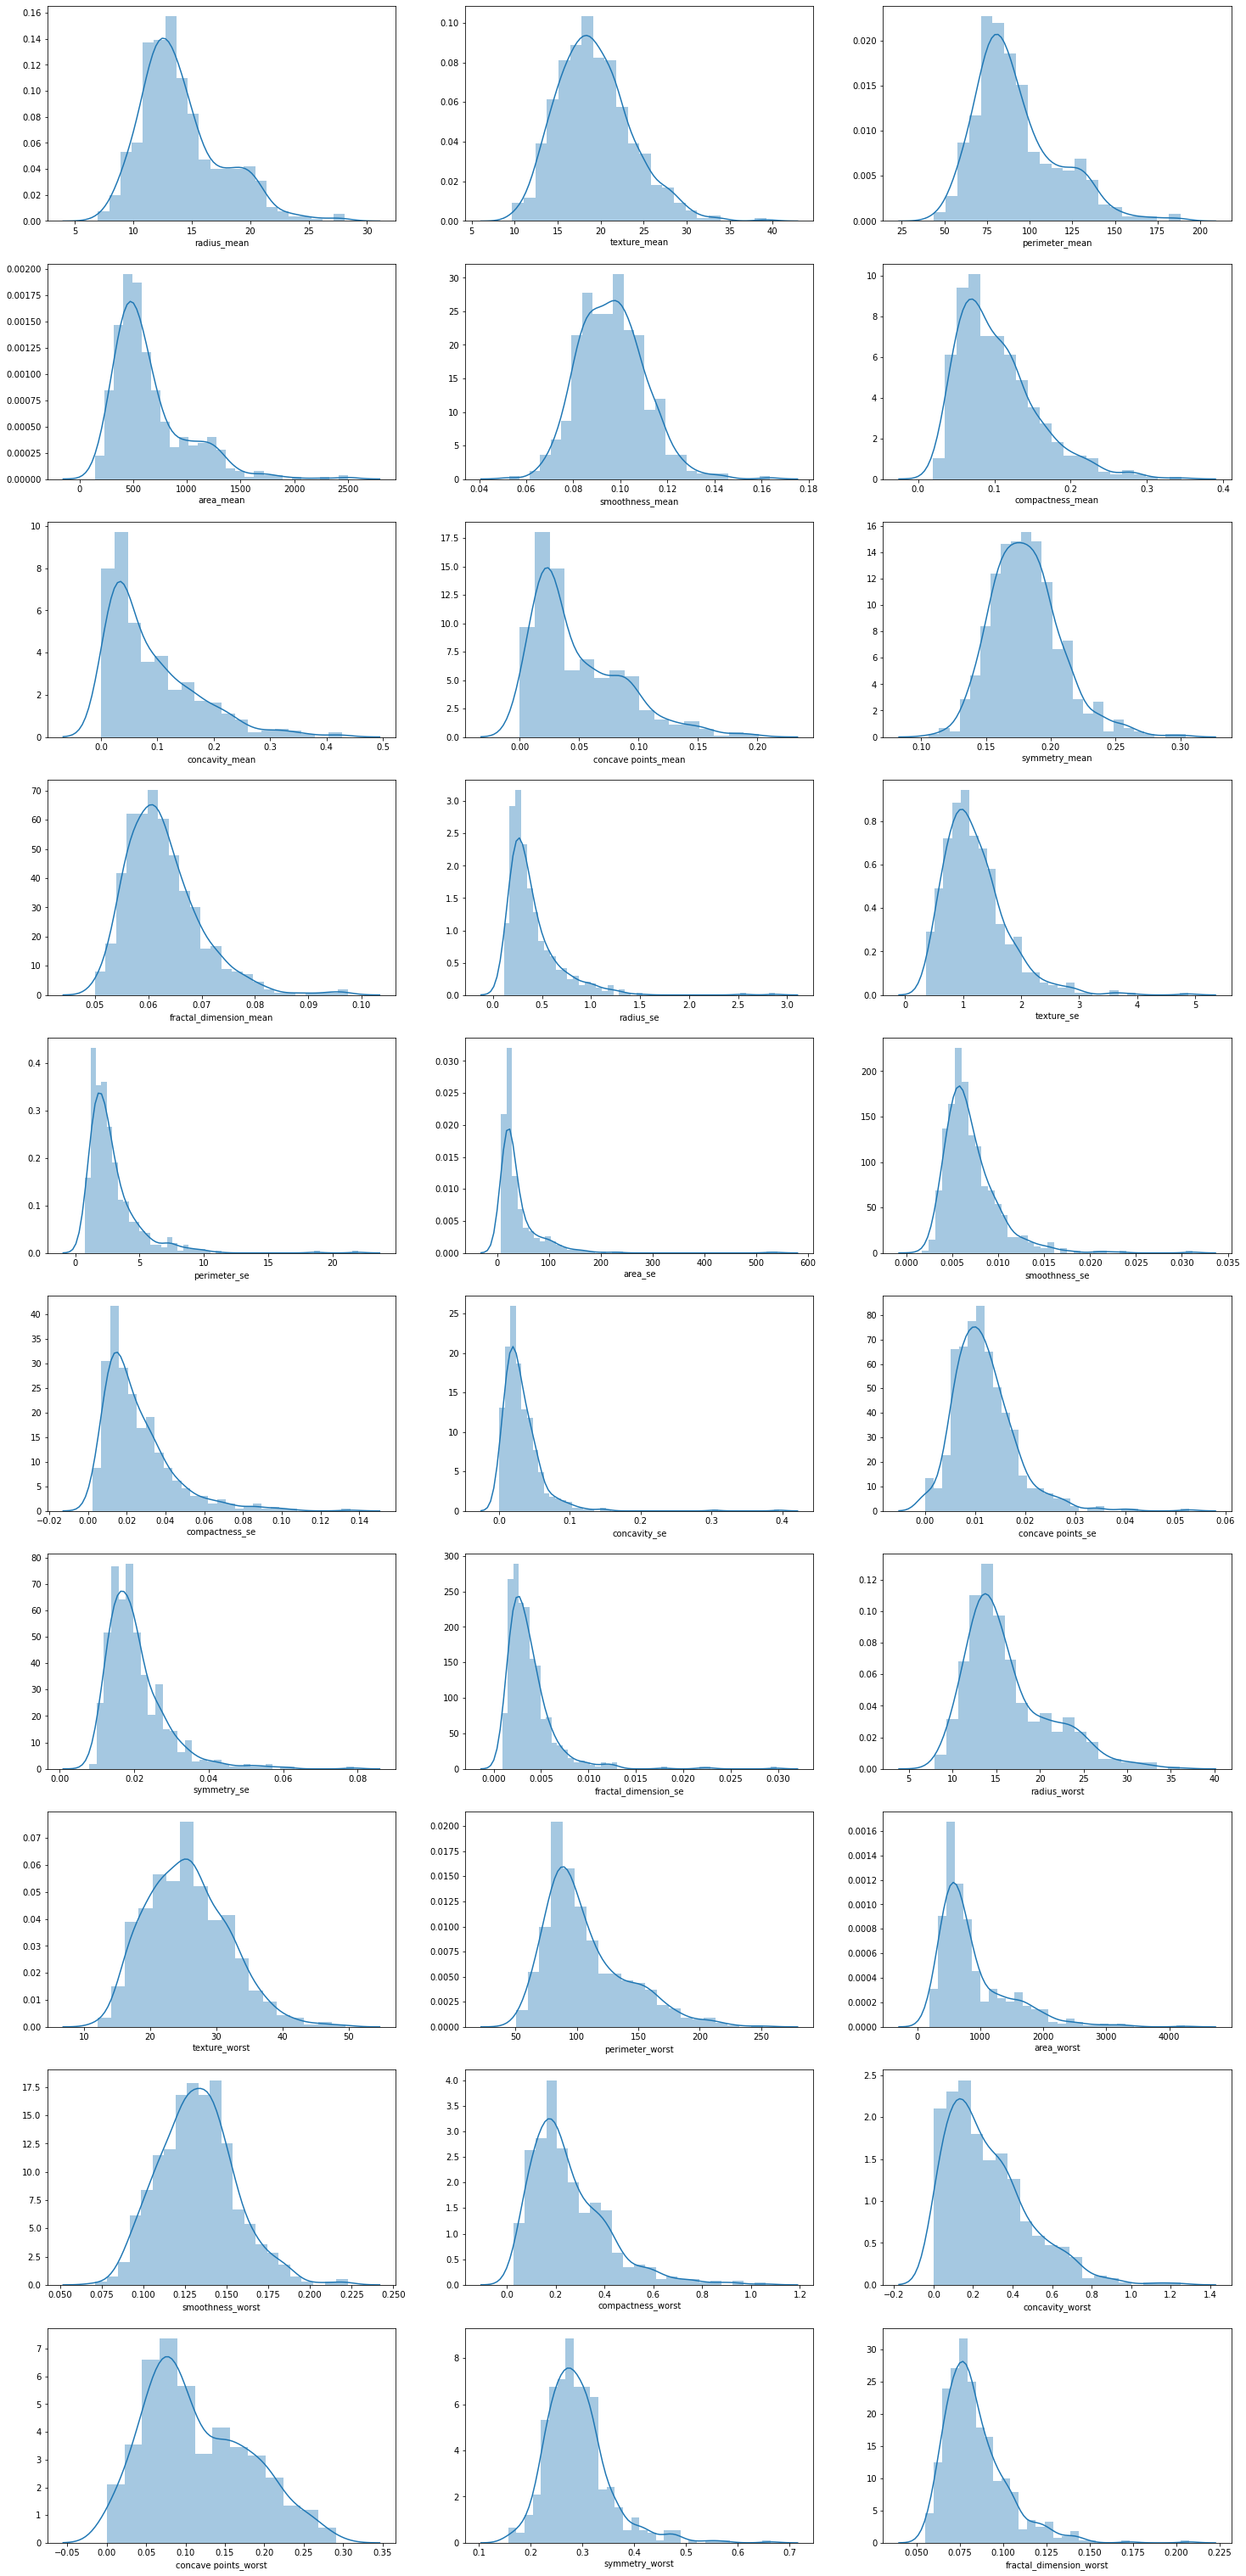

In [14]:
plt.figure(figsize = (25,55))
for i in range(1, len(cols_name)):
    plt.subplot(10, 3, i)
    sns.distplot(data[cols_name[i]])
plt.show()

- Many attributes follow 'Normal / Gaussian Distribution'
- Though many attributes have 'right skewness' present
- We can use StandardScaler() to handle this data

## Let's plot Box plots for outliers visualization

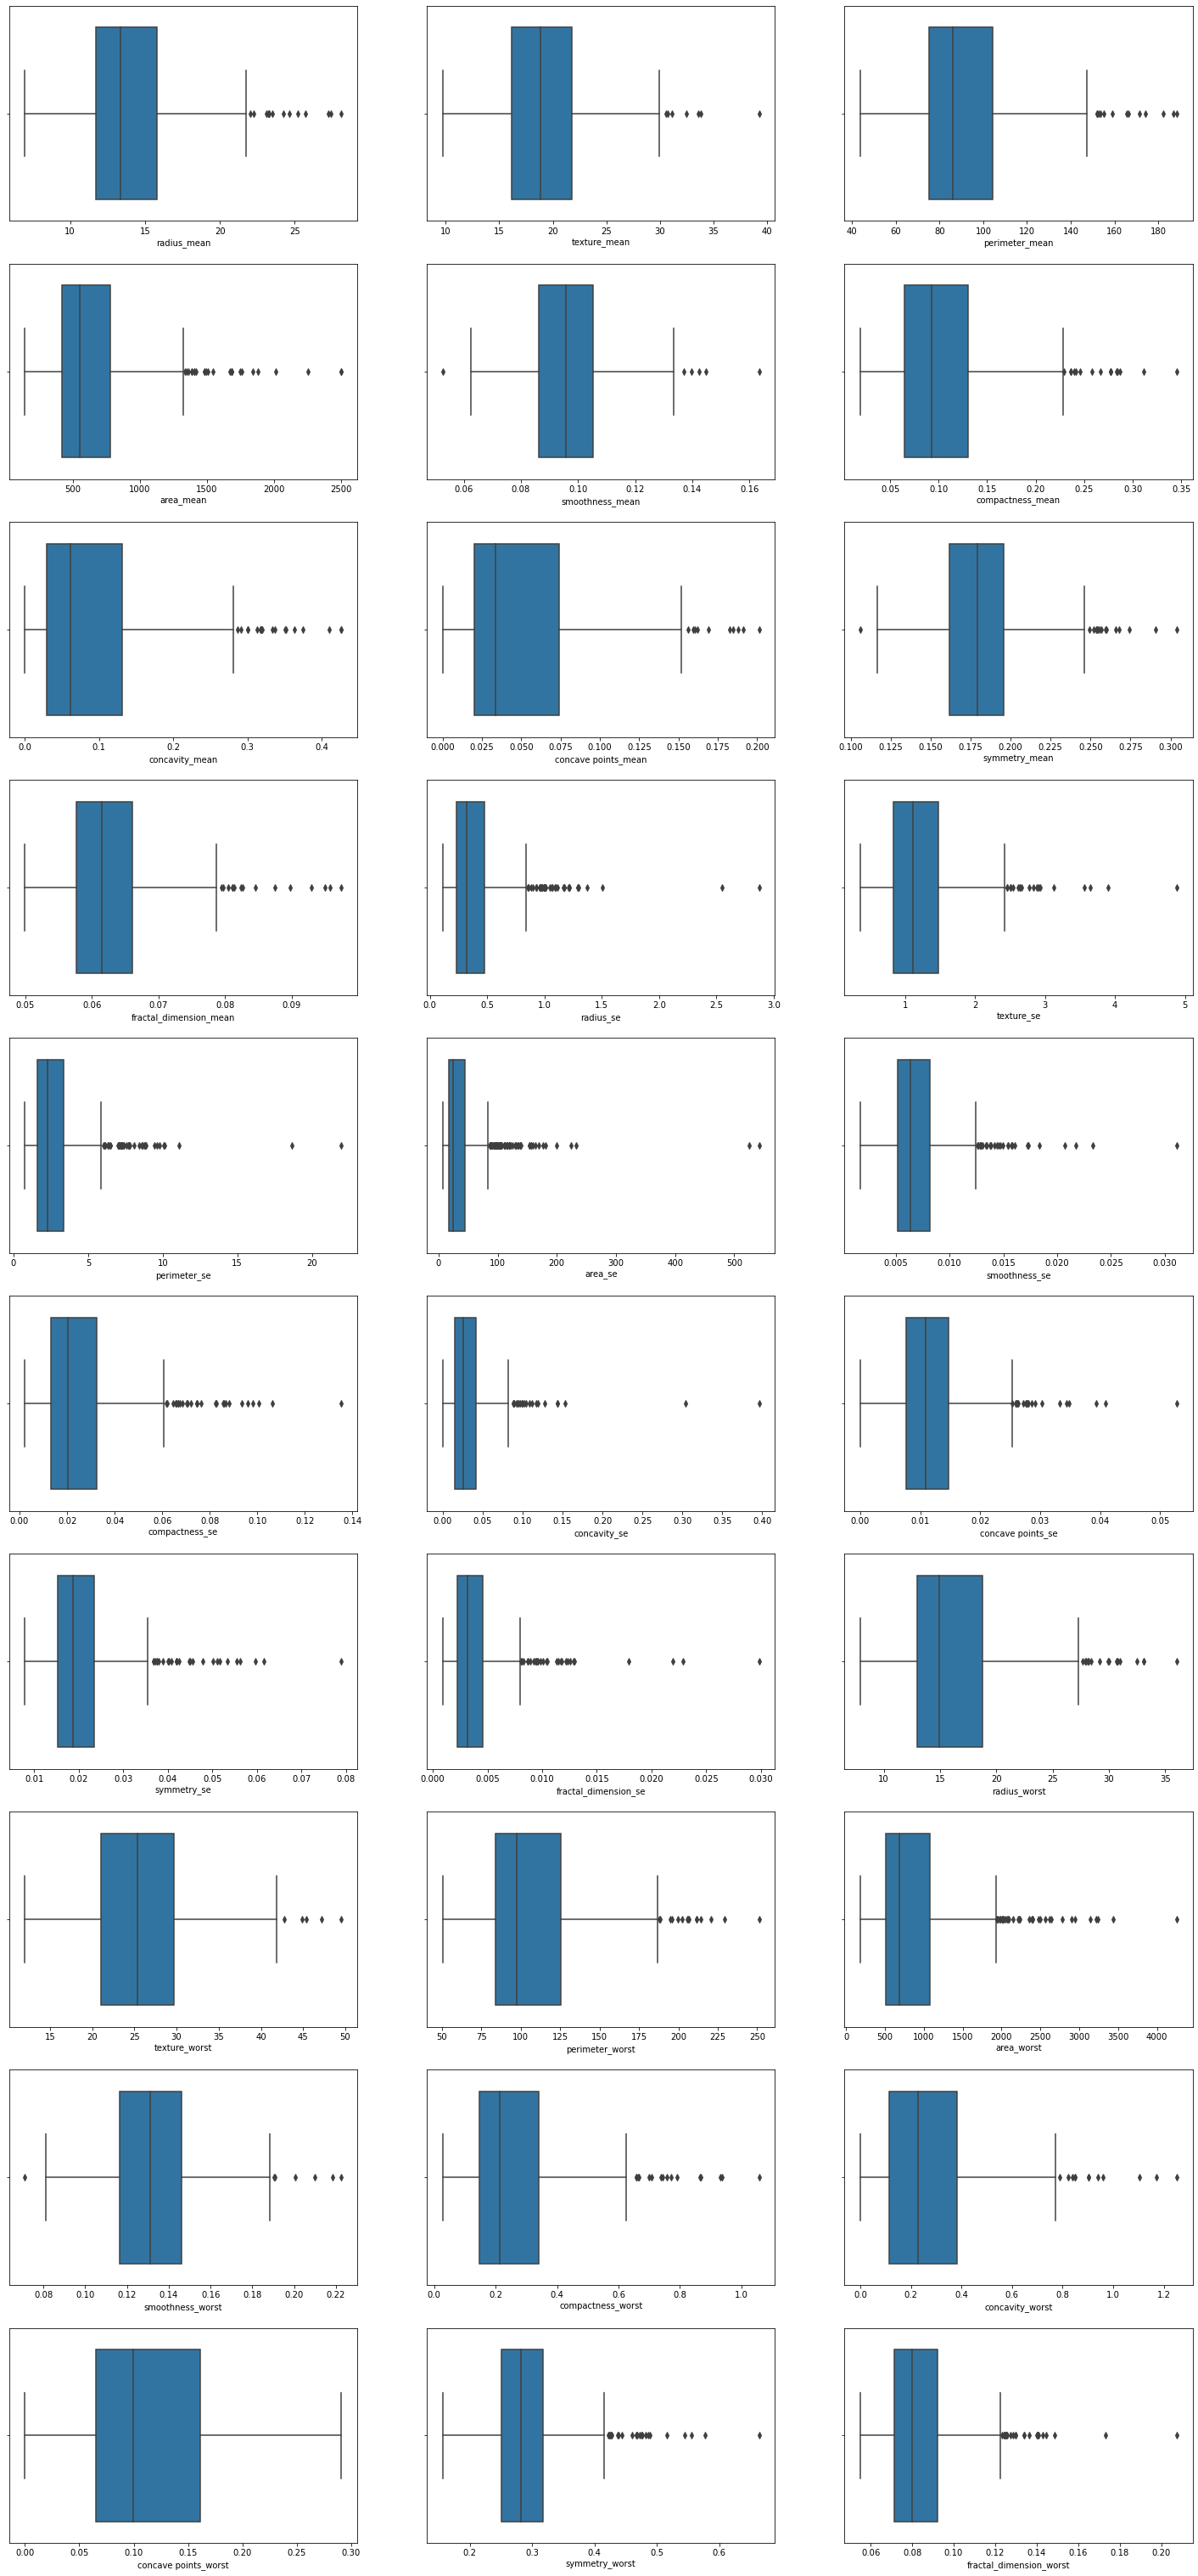

In [15]:
plt.figure(figsize = (25,55))
for i in range(1, len(cols_name)):
    plt.subplot(10, 3, i)
    sns.boxplot(data[cols_name[i]])
plt.show()

- Yes, we thought right, There are outliers present
- We will handle it with simple mathematics concept

# Bivariate Analysis

### Let's try to plot Corr

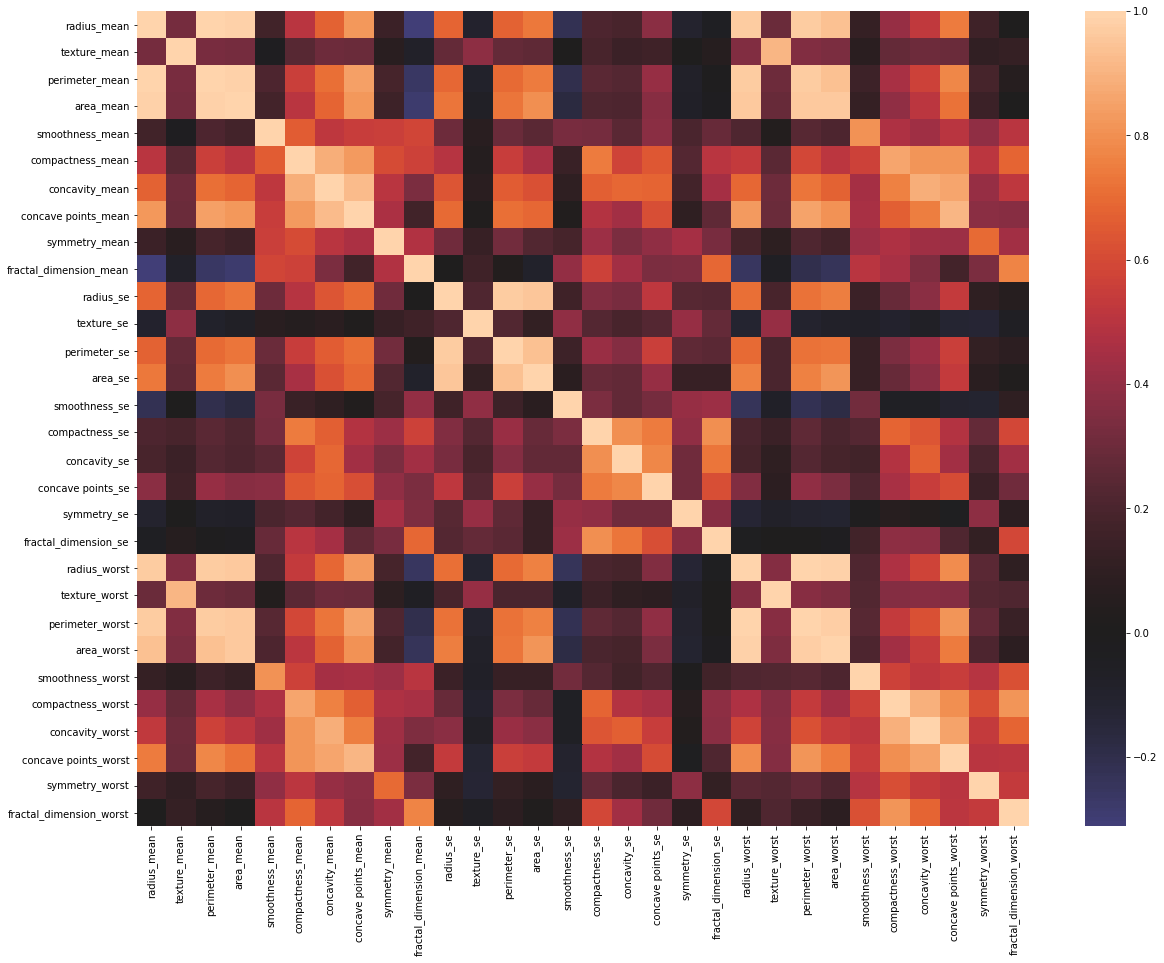

In [16]:
plt.figure(figsize = (20,15))
sns.heatmap(data[cols_name[1:]].corr(), center = 0)
plt.show()

- There are some features which are highly corr with each others

In [17]:
corr_matrix = data[cols_name[1:]].corr()
mask = corr_matrix >= 0.9
mask

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,True,False,True,True,False,False,False,False,False,False,...,True,False,True,True,False,False,False,False,False,False
texture_mean,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
perimeter_mean,True,False,True,True,False,False,False,False,False,False,...,True,False,True,True,False,False,False,False,False,False
area_mean,True,False,True,True,False,False,False,False,False,False,...,True,False,True,True,False,False,False,False,False,False
smoothness_mean,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
compactness_mean,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
concavity_mean,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
concave points_mean,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,True,False,False
symmetry_mean,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
fractal_dimension_mean,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


- There are many 'True' values presents
- Let's get all the columns pairs which are highly corr

In [18]:
corr_pairs = []
for column1 in cols_name[1:]:
    for column2 in cols_name[1:]:
        if corr_matrix[column1][column2] >= 0.9 and column1!=column2:
            pair = (column1, column2)
            if pair not in corr_pairs and pair[::-1] not in corr_pairs:
                corr_pairs.append(pair)
                
corr_pairs                

[('radius_mean', 'perimeter_mean'),
 ('radius_mean', 'area_mean'),
 ('radius_mean', 'radius_worst'),
 ('radius_mean', 'perimeter_worst'),
 ('radius_mean', 'area_worst'),
 ('texture_mean', 'texture_worst'),
 ('perimeter_mean', 'area_mean'),
 ('perimeter_mean', 'radius_worst'),
 ('perimeter_mean', 'perimeter_worst'),
 ('perimeter_mean', 'area_worst'),
 ('area_mean', 'radius_worst'),
 ('area_mean', 'perimeter_worst'),
 ('area_mean', 'area_worst'),
 ('concavity_mean', 'concave points_mean'),
 ('concave points_mean', 'concave points_worst'),
 ('radius_se', 'perimeter_se'),
 ('radius_se', 'area_se'),
 ('perimeter_se', 'area_se'),
 ('radius_worst', 'perimeter_worst'),
 ('radius_worst', 'area_worst'),
 ('perimeter_worst', 'area_worst')]

- We can notice that the above mentioned pairs are highly correlated with pearson correlation value >= 0.9. 
- We can eliminate the columns that are highly correlated based on the correlation of the column with the target data.

In [20]:
cols = list(set([col for i in corr_pairs for col in i]))

for col in cols:
    print('{} : {}'.format(col, data[col].corr(data['diagnosis'])))

perimeter_worst : 0.7829141371737585
radius_worst : 0.7764537785950386
texture_mean : 0.4151852998452039
concave points_worst : 0.7935660171412691
perimeter_se : 0.5561407034314826
texture_worst : 0.45690282139679794
area_mean : 0.7089838365853892
area_worst : 0.7338250349210506
concave points_mean : 0.7766138400204348
perimeter_mean : 0.7426355297258322
radius_mean : 0.7300285113754558
radius_se : 0.5671338208247172
area_se : 0.5482359402780236
concavity_mean : 0.6963597071719051


In [21]:
list_col = [col for col in cols if data[col].corr(data['diagnosis'])>=0.7]

In [22]:
list_col

['perimeter_worst',
 'radius_worst',
 'concave points_worst',
 'area_mean',
 'area_worst',
 'concave points_mean',
 'perimeter_mean',
 'radius_mean']

- We will keep only columns that have corr>=0.7 with 'diagnosis' column

In [32]:
for col in cols:
    if col not in list_col:
        data.drop(columns=col, inplace = True)
data.shape

(569, 25)

In [33]:
data.head()

,diagnosis,radius_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,...,fractal_dimension_se,radius_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,122.80,1001.0,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,...,0.006193,25.38,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,132.90,1326.0,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,...,0.003532,24.99,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,130.00,1203.0,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,...,0.004571,23.57,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,77.58,386.1,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,...,0.009208,14.91,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,135.10,1297.0,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,...,0.005115,22.54,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [34]:
X = data[data.columns[1:]]
y = data['diagnosis']

## Without handle Outliers and Data Imbalanced

### Since we have algorithms available which are not sensitive to outliers and/or data imbalanced

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.2, random_state = 42)

# Random-forest Classifier

Accuracy on Test Data: 94.73684210526315%
Precision Score: 0.9512195121951219
Recall Score: 0.9069767441860465
F1 Score: 0.9285714285714286


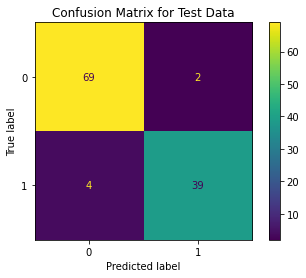

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


Accuracy on Whole Data: 98.94551845342706%
Precision Score: 0.9904761904761905
Recall Score: 0.9811320754716981
F1 Score: 0.9857819905213271


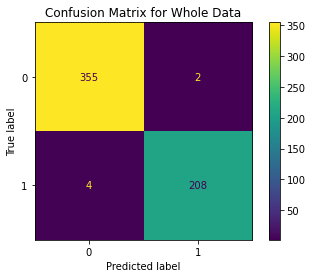

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       357
           1       0.99      0.98      0.99       212

    accuracy                           0.99       569
   macro avg       0.99      0.99      0.99       569
weighted avg       0.99      0.99      0.99       569



In [36]:
rf_pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(random_state = 18))
rf_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = rf_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
print(f"Precision Score: {precision_score(y_test, predictions)}")
print(f"Recall Score: {recall_score(y_test, predictions)}")
print(f"F1 Score: {f1_score(y_test, predictions)}")
plot_confusion_matrix(rf_pipeline, X_test, y_test)
plt.title("Confusion Matrix for Test Data")
plt.show()
print(classification_report(y_test, predictions))

print()

# Accuray On Whole Data
predictions = rf_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
print(f"Precision Score: {precision_score(y, predictions)}")
print(f"Recall Score: {recall_score(y, predictions)}")
print(f"F1 Score: {f1_score(y, predictions)}")
plot_confusion_matrix(rf_pipeline, X.values, y)
plt.title("Confusion Matrix for Whole Data")
plt.show()
print(classification_report(y, predictions))

# XGBoost Classifier

c:\users\rkshi\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:27:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy on Test Data: 94.73684210526315%
Precision Score: 0.9512195121951219
Recall Score: 0.9069767441860465
F1 Score: 0.9285714285714286


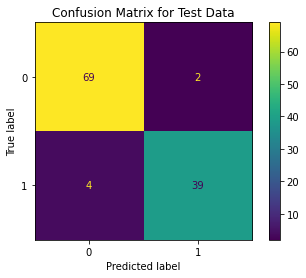

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


Accuracy on Whole Data: 98.94551845342706%
Precision Score: 0.9904761904761905
Recall Score: 0.9811320754716981
F1 Score: 0.9857819905213271


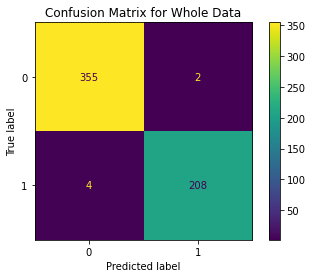

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       357
           1       0.99      0.98      0.99       212

    accuracy                           0.99       569
   macro avg       0.99      0.99      0.99       569
weighted avg       0.99      0.99      0.99       569



In [37]:
xgb_pipeline = make_pipeline(StandardScaler(), XGBClassifier(random_state = 18))
xgb_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = xgb_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
print(f"Precision Score: {precision_score(y_test, predictions)}")
print(f"Recall Score: {recall_score(y_test, predictions)}")
print(f"F1 Score: {f1_score(y_test, predictions)}")
plot_confusion_matrix(xgb_pipeline, X_test, y_test)
plt.title("Confusion Matrix for Test Data")
plt.show()
print(classification_report(y_test, predictions))

print()

# Accuray On Whole Data
predictions = xgb_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
print(f"Precision Score: {precision_score(y, predictions)}")
print(f"Recall Score: {recall_score(y, predictions)}")
print(f"F1 Score: {f1_score(y, predictions)}")
plot_confusion_matrix(xgb_pipeline, X.values, y)
plt.title("Confusion Matrix for Whole Data")
plt.show()
print(classification_report(y, predictions))

# Optional : Way to deal with outliers

### We are going to use Maths...!!

- Get Q1 and Q3 of every columns
- Find out IQR = Q3-Q1
- Calculate lower_bound and upper_bound
- If datapoint's values fall below lower_bound => Replace it with lower_bound itself
- If datapoint's values fall below upper_bound => Replace it with upper_bound itself

In [38]:
def handle_outlier(data):
        data_copy = data.copy()
        data = data._get_numeric_data()


        q1 = data.quantile(0.25)
        q3 = data.quantile(0.75)

        iqr = q3 - q1

        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr)


        for col in df.columns:
            for i in range(0,len(data[col])):
                if data[col][i] < lower_bound[col]:            
                    data[col][i] = lower_bound[col]

                if data[col][i] > upper_bound[col]:            
                    data[col][i] = upper_bound[col]    


        for col in data.columns:
            data_copy[col] = data[col]

        return(data_copy)

X = handle_outlier(X)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.2, random_state = 42)

# Random-forest Classifier

Accuracy on Test Data: 94.73684210526315%
Precision Score: 0.9512195121951219
Recall Score: 0.9069767441860465
F1 Score: 0.9285714285714286


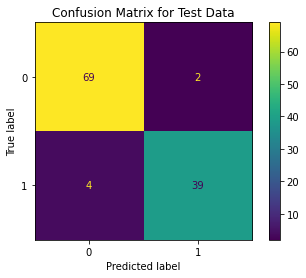

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


Accuracy on Whole Data: 98.94551845342706%
Precision Score: 0.9904761904761905
Recall Score: 0.9811320754716981
F1 Score: 0.9857819905213271


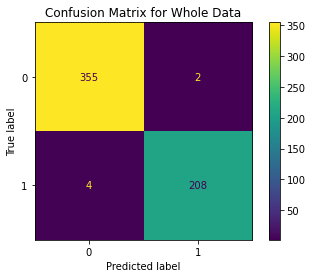

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       357
           1       0.99      0.98      0.99       212

    accuracy                           0.99       569
   macro avg       0.99      0.99      0.99       569
weighted avg       0.99      0.99      0.99       569



In [40]:
rf_pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(random_state = 18))
rf_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = rf_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
print(f"Precision Score: {precision_score(y_test, predictions)}")
print(f"Recall Score: {recall_score(y_test, predictions)}")
print(f"F1 Score: {f1_score(y_test, predictions)}")
plot_confusion_matrix(rf_pipeline, X_test, y_test)
plt.title("Confusion Matrix for Test Data")
plt.show()
print(classification_report(y_test, predictions))

print()

# Accuray On Whole Data
predictions = rf_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
print(f"Precision Score: {precision_score(y, predictions)}")
print(f"Recall Score: {recall_score(y, predictions)}")
print(f"F1 Score: {f1_score(y, predictions)}")
plot_confusion_matrix(rf_pipeline, X.values, y)
plt.title("Confusion Matrix for Whole Data")
plt.show()
print(classification_report(y, predictions))

# XGBoost Classifier

[16:27:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy on Test Data: 93.85964912280701%
Precision Score: 0.95
Recall Score: 0.8837209302325582
F1 Score: 0.9156626506024096


c:\users\rkshi\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


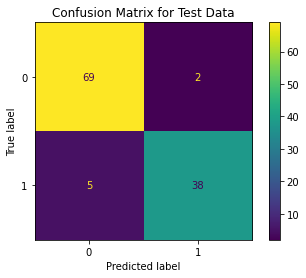

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        71
           1       0.95      0.88      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114


Accuracy on Whole Data: 98.76977152899823%
Precision Score: 0.9904306220095693
Recall Score: 0.9764150943396226
F1 Score: 0.9833729216152018


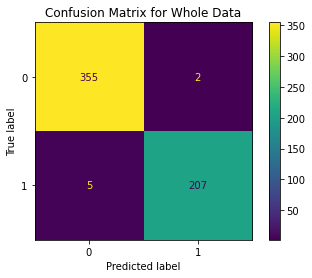

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       357
           1       0.99      0.98      0.98       212

    accuracy                           0.99       569
   macro avg       0.99      0.99      0.99       569
weighted avg       0.99      0.99      0.99       569



In [41]:
xgb_pipeline = make_pipeline(StandardScaler(), XGBClassifier(random_state = 18))
xgb_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = xgb_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
print(f"Precision Score: {precision_score(y_test, predictions)}")
print(f"Recall Score: {recall_score(y_test, predictions)}")
print(f"F1 Score: {f1_score(y_test, predictions)}")
plot_confusion_matrix(xgb_pipeline, X_test, y_test)
plt.title("Confusion Matrix for Test Data")
plt.show()
print(classification_report(y_test, predictions))

print()

# Accuray On Whole Data
predictions = xgb_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
print(f"Precision Score: {precision_score(y, predictions)}")
print(f"Recall Score: {recall_score(y, predictions)}")
print(f"F1 Score: {f1_score(y, predictions)}")
plot_confusion_matrix(xgb_pipeline, X.values, y)
plt.title("Confusion Matrix for Whole Data")
plt.show()
print(classification_report(y, predictions))

In [42]:
counter = Counter(y_train)
counter

Counter({0: 286, 1: 169})

# Optional : Way to handle imbalanced dataset

### Since we don't have much data available, We can only Upsample the data

In [43]:
X = data[data.columns[1:]]
y = data['diagnosis']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.2, random_state = 42)

In [45]:
upsample = SMOTE()
X_train, y_train = upsample.fit_resample(X_train, y_train)
counter = Counter(y_train)
print(counter)

Counter({0: 286, 1: 286})


# Random-forest Classifier

Accuracy on Test Data: 97.36842105263158%
Precision Score: 0.9545454545454546
Recall Score: 0.9767441860465116
F1 Score: 0.9655172413793104


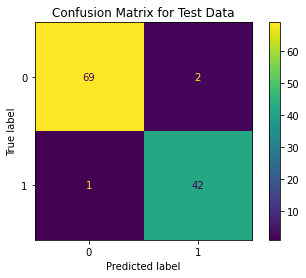

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Accuracy on Whole Data: 99.47275922671353%
Precision Score: 0.9906103286384976
Recall Score: 0.9952830188679245
F1 Score: 0.9929411764705881


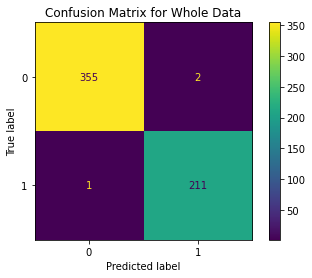

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       357
           1       0.99      1.00      0.99       212

    accuracy                           0.99       569
   macro avg       0.99      0.99      0.99       569
weighted avg       0.99      0.99      0.99       569



In [46]:
rf_pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(random_state = 18))
rf_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = rf_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
print(f"Precision Score: {precision_score(y_test, predictions)}")
print(f"Recall Score: {recall_score(y_test, predictions)}")
print(f"F1 Score: {f1_score(y_test, predictions)}")
plot_confusion_matrix(rf_pipeline, X_test, y_test)
plt.title("Confusion Matrix for Test Data")
plt.show()
print(classification_report(y_test, predictions))

print()

# Accuray On Whole Data
predictions = rf_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
print(f"Precision Score: {precision_score(y, predictions)}")
print(f"Recall Score: {recall_score(y, predictions)}")
print(f"F1 Score: {f1_score(y, predictions)}")
plot_confusion_matrix(rf_pipeline, X.values, y)
plt.title("Confusion Matrix for Whole Data")
plt.show()
print(classification_report(y, predictions))

# XGBoost Classifier

[16:27:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy on Test Data: 94.73684210526315%
Precision Score: 0.9302325581395349
Recall Score: 0.9302325581395349
F1 Score: 0.9302325581395349


c:\users\rkshi\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


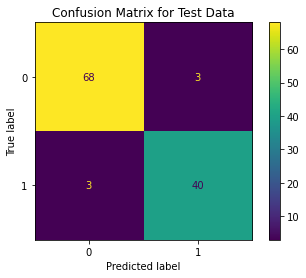

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


Accuracy on Whole Data: 98.94551845342706%
Precision Score: 0.9858490566037735
Recall Score: 0.9858490566037735
F1 Score: 0.9858490566037735


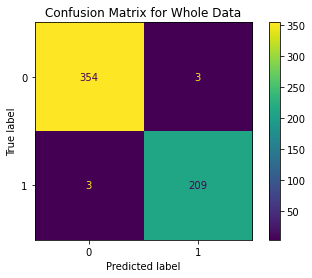

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       357
           1       0.99      0.99      0.99       212

    accuracy                           0.99       569
   macro avg       0.99      0.99      0.99       569
weighted avg       0.99      0.99      0.99       569



In [47]:
xgb_pipeline = make_pipeline(StandardScaler(), XGBClassifier(random_state = 18))
xgb_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = xgb_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
print(f"Precision Score: {precision_score(y_test, predictions)}")
print(f"Recall Score: {recall_score(y_test, predictions)}")
print(f"F1 Score: {f1_score(y_test, predictions)}")
plot_confusion_matrix(xgb_pipeline, X_test, y_test)
plt.title("Confusion Matrix for Test Data")
plt.show()
print(classification_report(y_test, predictions))

print()

# Accuray On Whole Data
predictions = xgb_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
print(f"Precision Score: {precision_score(y, predictions)}")
print(f"Recall Score: {recall_score(y, predictions)}")
print(f"F1 Score: {f1_score(y, predictions)}")
plot_confusion_matrix(xgb_pipeline, X.values, y)
plt.title("Confusion Matrix for Whole Data")
plt.show()
print(classification_report(y, predictions))

# Conclusion :
### Random forest performed well compare to XGBoost
### Handling outliers didn't help well
### By just handling data imbalancing we got very good Accuracy.